In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [13]:
ln_df = df[['volatile acidity', 'alcohol', 'density', 'quality']].copy()
ln_df

,volatile acidity,alcohol,density,quality
0,0.27,8.8,1.00100,6
1,0.30,9.5,0.99400,6
2,0.28,10.1,0.99510,6
3,0.23,9.9,0.99560,6
4,0.23,9.9,0.99560,6
...,...,...,...,...
4893,0.21,11.2,0.99114,6
4894,0.32,9.6,0.99490,5
4895,0.24,9.4,0.99254,6
4896,0.29,12.8,0.98869,7


In [18]:
len(ln_df)

4898

In [15]:
ln_test = ln_df.sample(frac=0.25)
len(ln_test)

1224

In [19]:
ln_train = ln_df.loc[~ln_df.index.isin(ln_test.index)]
len(ln_train)

3674

In [23]:
x_train = ln_train[['volatile acidity','alcohol','density']]
y_train = ln_train['quality']
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [25]:
x_test = ln_test[['volatile acidity','alcohol','density']]
y_test = ln_test['quality']

y_pred = model.predict(x_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0.3  0.28 0.23 ... 0.24 0.29 0.21].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

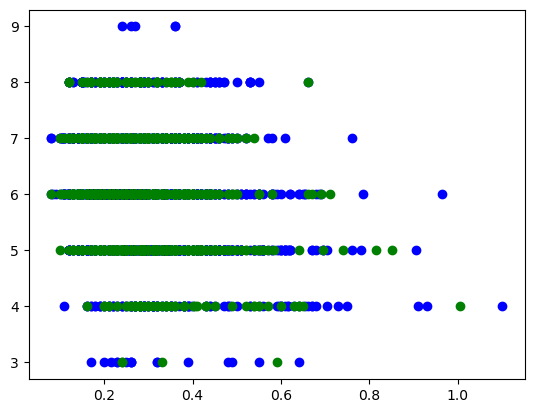

In [36]:
# Plotting the training data
plt.scatter(x_train['volatile acidity'], y_train, color='blue', label='Training Data')
# Plotting the test data
plt.scatter(x_test['volatile acidity'], y_test, color='green', label='Test Data')

# Plotting the regression line
plt.plot(x_train['volatile acidity'], model.predict(x_train['volatile acidity']), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.legend()
plt.title('Volatile vs. Quality')

# Show the plot
plt.show()

In [29]:
intercept = model.intercept_
coefficients = model.coef_
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

Intercept: -34.388158535855986
Coefficients: [-2.00920461  0.39893502 36.85600125]
RMSE: 0.7847318334808504
R^2: 0.23487396737641852
